In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset

raw_data = pd.read_csv('Iris.csv')
raw_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#remove 'Id' column

raw_data.drop('Id',axis=1, inplace=True)

In [4]:
raw_data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
raw_data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
x_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

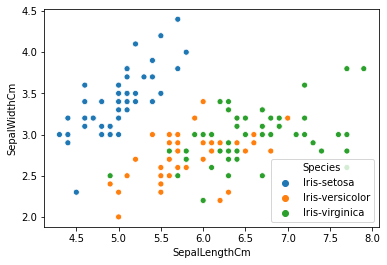

In [7]:
# plot scatterplot
# to look how points are scattered over. Here we see for two features 'SepalLengthCm' and 'SepalWidthCm'.

sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=raw_data)

#####  Here we see, a linear regression is suffiecient to seperate Iris-setosa from the crowd, but SepalLengthCm and SepalWidthCm are not really helpful for seperating Iris-versicolor and Iris-virginica

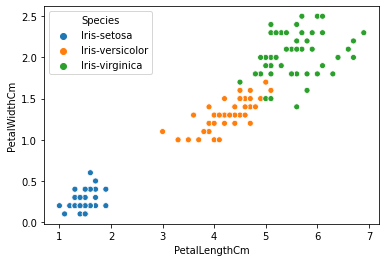

In [8]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=raw_data)

#### By just using PetalLengthCm we can seperate out Iris-setosa. Also PetalLengthCm along with PetalLengthCm is useful in seperating other two clusters, which can easily be done using classification techniques.

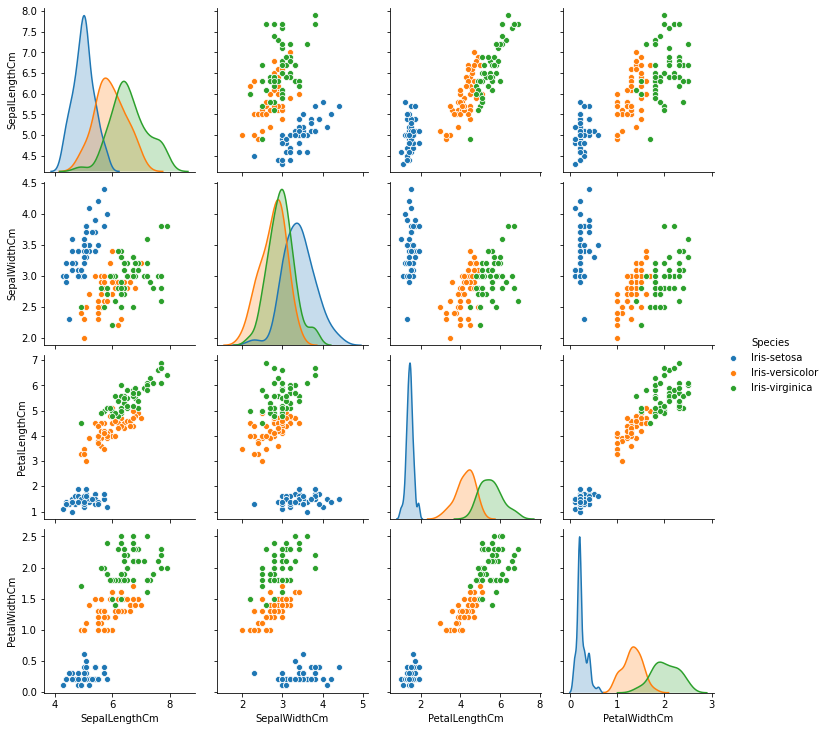

In [9]:
sns.pairplot(data = raw_data,hue='Species')

#### Pairplots are really amazing, they help see relation between features when there are more than three features in the data, as we cannot draw any 4-D graph or any n-D graph with n>3. They can help to analyse which type of regression analysis can be used. As here, only a threshold is enough to cluster Iris-setosa. Also, the diagonal elements show the pdf of each feature.

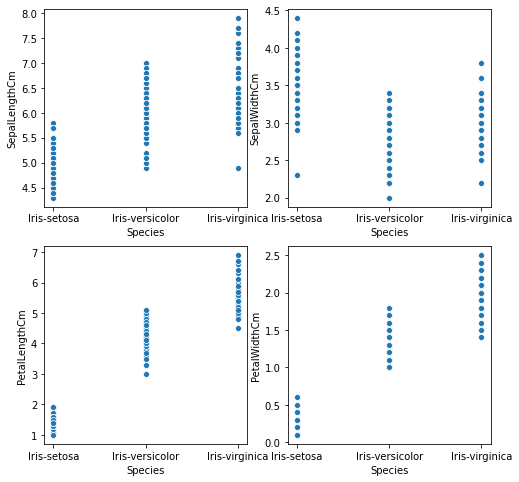

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))


sns.scatterplot(x='Species',y='SepalLengthCm',data=raw_data, ax = axs[0,0])
sns.scatterplot(x='Species',y='SepalWidthCm',data=raw_data, ax = axs[0,1])
sns.scatterplot(x='Species',y='PetalLengthCm',data=raw_data, ax = axs[1,0])
sns.scatterplot(x='Species',y='PetalWidthCm',data=raw_data, ax = axs[1,1])

#### This again a scatter plot, but here we took 'Species' as x-axis and each feature on y-axis. This again shows y=a (threshold) is enough to seperate Iris-setosa shown by both fig(2,1) and fig(2,2). Here we can say PetalLengthCm < 2.5 as Iris-setosa or PetalWidth < 0.7 as Iris-setosa. But other categories cannot be seperated by just using threshold.

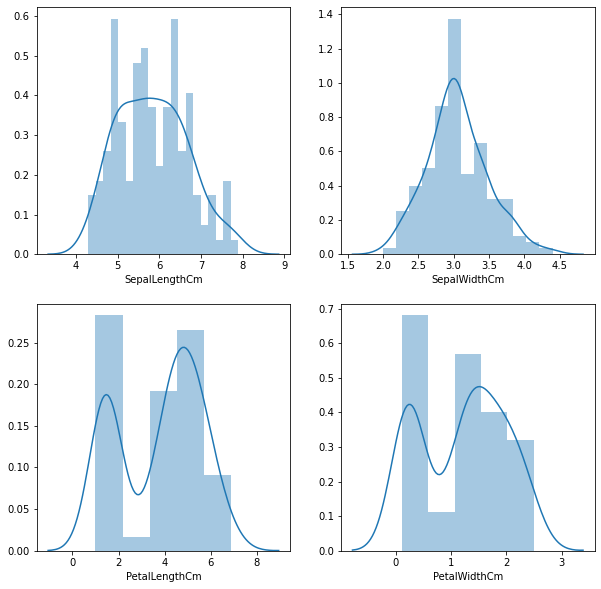

In [11]:
g, axs = plt.subplots(2, 2, figsize=(10,10))


sns.distplot(a=raw_data['SepalLengthCm'], ax = axs[0,0],bins=20)
sns.distplot(a=raw_data['SepalWidthCm'], ax = axs[0,1])
sns.distplot(a=raw_data['PetalLengthCm'], ax = axs[1,0])
sns.distplot(a=raw_data['PetalWidthCm'], ax = axs[1,1])

#### Here we have amazing results. I made distribution plots for each feature. In fig(1,1) we see negative kurtosis which means large number of SepalLengthCm values surround its mean. Next in fig(1,2) we see positive kurtosis which mean less number of SepalWidthCm values surround its mean. Also in fig(2,1) and fig(2,2) we see bimodal distribution, which tells that PetalLengthCm and PetalWidthCm have two different groups each which further indicates that both distributions have two peaks that represent two local maximas, thus we have two groups of values where certain ranges of Length and Width of Petals are clustering.  

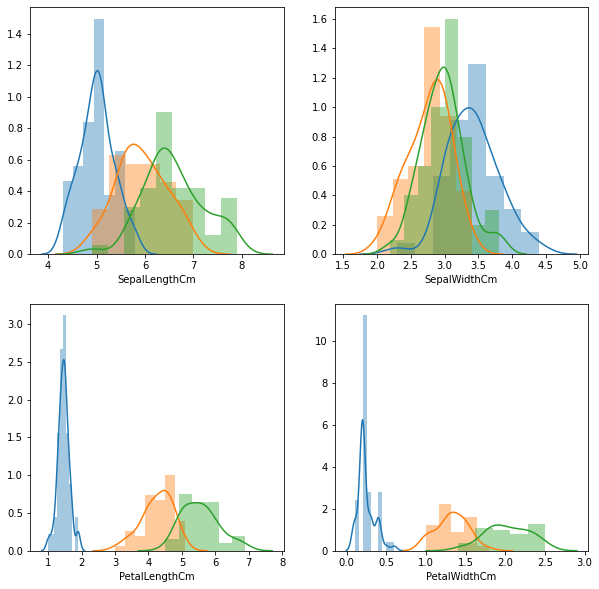

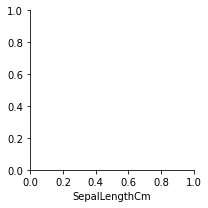

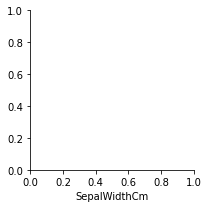

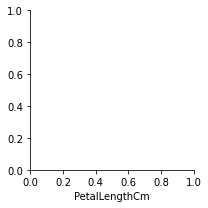

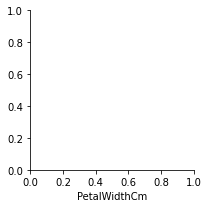

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sns.FacetGrid(raw_data, hue="Species").map(sns.distplot, "SepalLengthCm", ax = axs[0,0])
sns.FacetGrid(raw_data, hue="Species").map(sns.distplot, "SepalWidthCm",  ax = axs[0,1])
sns.FacetGrid(raw_data, hue="Species").map(sns.distplot, "PetalLengthCm", ax = axs[1,0])
sns.FacetGrid(raw_data, hue="Species").map(sns.distplot, "PetalWidthCm",  ax = axs[1,1])

#### This again distribution plots for each of the features, giving similar results as we had before. Just visualization is different. We can see that SepalLengthCm and SepalWidthCm alone cannot seperate out clusters, they do need some more information like more features to do so. But yes, as we saw before, PetalLengthCm and PetalWidthCm can for sure make different cluster for Iris-setosa just by seeting a threshold, however not for Iris-versicolor or Iris-verginica.

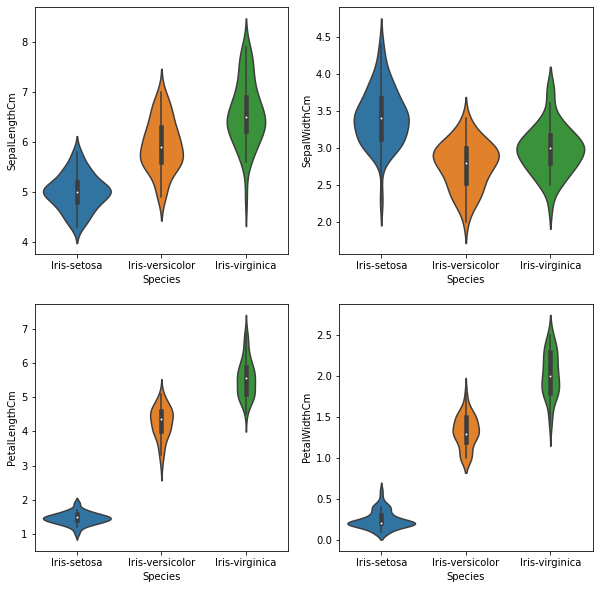

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(x='Species',y='SepalLengthCm',data = raw_data, ax = axs[0,0])
sns.violinplot(x='Species',y='SepalWidthCm',data = raw_data, ax = axs[0,1])
sns.violinplot(x='Species',y='PetalLengthCm',data = raw_data, ax = axs[1,0])
sns.violinplot(x='Species',y='PetalWidthCm',data = raw_data, ax = axs[1,1])

#### Violin plots are similar to box plots and gives probability density of the data as well, usually smoothened by kernel density estimator. 

In [14]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = raw_data.loc[raw_data["Species"] == "Iris-setosa"]
iris_virginica = raw_data.loc[raw_data["Species"] == "Iris-virginica"]
iris_versicolor = raw_data.loc[raw_data["Species"] == "Iris-versicolor"]

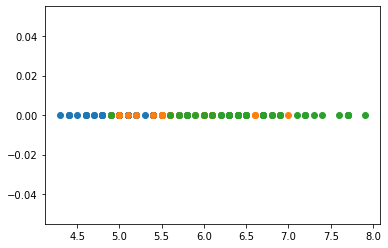

In [15]:
plt.plot(iris_setosa["SepalLengthCm"], np.zeros_like(iris_setosa['SepalLengthCm']),'o')
plt.plot(iris_versicolor["SepalLengthCm"], np.zeros_like(iris_versicolor['SepalLengthCm']), 'o')
plt.plot(iris_virginica["SepalLengthCm"], np.zeros_like(iris_virginica['SepalLengthCm']), 'o')


#### In this I just alligned the SepalLengthCm of all three classes in a row which tells SepalLengthCm alone cannot cluster out the species.

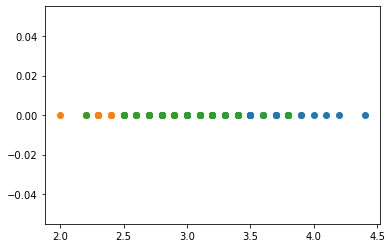

In [16]:
plt.plot(iris_setosa["SepalWidthCm"], np.zeros_like(iris_setosa['SepalWidthCm']),'o')
plt.plot(iris_versicolor["SepalWidthCm"], np.zeros_like(iris_versicolor['SepalWidthCm']), 'o')
plt.plot(iris_virginica["SepalWidthCm"], np.zeros_like(iris_virginica['SepalWidthCm']), 'o')

#### In this I just alligned the SepalWidthCm of all three classes in a row which tells SepalWidththCm alone cannot cluster out the species.

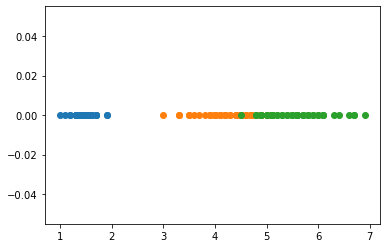

In [17]:
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']),'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']), 'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']), 'o')

#### In this I just alligned the PetalLengthCm of all three classes in a row which tells PetalLengthCm alone can cluster out Iris-setosa but for other two classes we need more features.

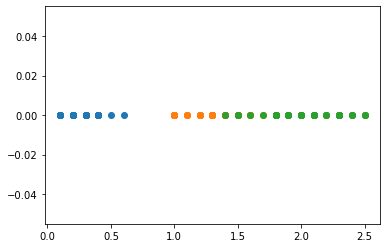

In [18]:
plt.plot(iris_setosa["PetalWidthCm"], np.zeros_like(iris_setosa['PetalWidthCm']),'o')
plt.plot(iris_versicolor["PetalWidthCm"], np.zeros_like(iris_versicolor['PetalWidthCm']), 'o')
plt.plot(iris_virginica["PetalWidthCm"], np.zeros_like(iris_virginica['PetalWidthCm']), 'o')

#### In this I just alligned the PetalWidthCm of all three classes in a row which tells PetalWidthCm alone can cluster out Iris-setosa but for other two classes we need more features. Even though we can see the seperation but still they are too close that we cannot risk using just threshold.

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


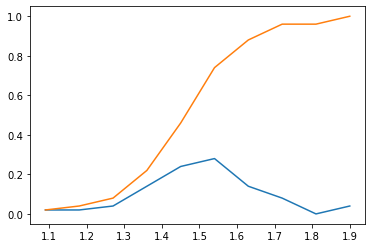

In [19]:
#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

#### Earlier we saw PetalLengthCm of Iris-setosa ranges from 1 to 2, however drawing pdf gives more magnified image of it range. Here we can see where in the range, which Length has more density , and thus we can see 1.54cm is PetalLengthCm which a large number of Iris-setosa have. Also I have drawn the CDF, whiche reveals what fraction or percent of Iris-setosa has PetalLength less than any particular Length. Say 74% of the Iris-setosa has PetalLengthCm < 1.54  

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]


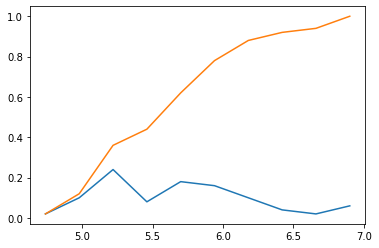

In [20]:
#Plot CDF of PetalLengthCm

counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.06 0.12 0.16 0.32 0.46 0.58 0.78 0.92 1.  ]


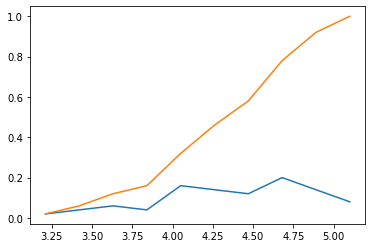

In [21]:
#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.06 0.12 0.16 0.32 0.46 0.58 0.78 0.92 1.  ]


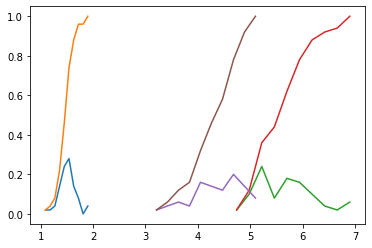

In [22]:
# Iris-setosa
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(bin_edges)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Iris-virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(bin_edges)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Iris-versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(bin_edges)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

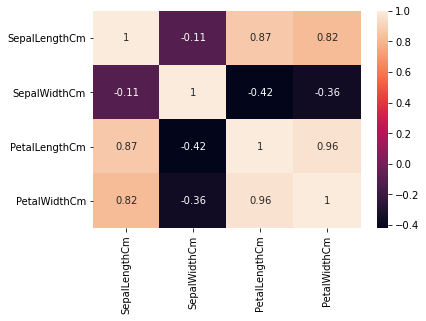

In [23]:
#correlation_matrix = raw_data.corr()
#top_corr_features = correlation_matrix.index
#plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(),annot=True)
#plt.xticks(rotation=45)

In [24]:
X = raw_data.iloc[:,0:-1].values
y = raw_data['Species'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


1.0

In [27]:
from sklearn.metrics import recall_score
rs = recall_score(y_test, y_pred, average='micro')
print(rs)

from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred, average='micro')
print(ps)

from sklearn.metrics import f1_score
fs = f1_score(y_test,y_pred, average='micro')
print(fs)


1.0
1.0
1.0
